# Pandas for Data Science
This notebook demonstrates powerful capabilities of the Pandas library using a complex dataset.


In [1]:
import pandas as pd
import numpy as np

# load employee data
employee_data = pd.read_csv('employee_data.csv')
# Display the first few rows of the dataset
employee_data.head()

,EmployeeID,Name,Department,Team,JoinDate,Age,Salary,PerformanceScore
0,1,Emp_1,Finance,D,2019-03-22,29,80704,3.83
1,2,Emp_2,Sales,A,2020-06-24,48,51561,2.32
2,3,Emp_3,HR,C,2020-01-29,44,82741,3.78
3,4,Emp_4,HR,E,2019-01-09,36,33041,2.99
4,5,Emp_5,HR,B,2019-05-26,53,87055,3.76


### GroupBy and Multi-Level Aggregation

In [3]:
# Average salary and performance by Department and Team
agg_df = employee_data.groupby(['Department', 'Team']).agg({
    'Salary': ['mean', 'max', 'min'],
    'PerformanceScore': ['mean', 'std'],
    'Age': 'median'
})
agg_df

Salary                PerformanceScore            \
                               mean     max    min             mean       std   
Department       Team                                                           
Finance          A     69902.476190  115022  31337         2.871667  0.425268   
                 B     77782.512821  119344  34715         3.064103  0.380289   
                 C     71757.066667  115145  30102         3.013000  0.382209   
                 D     73366.250000  119763  32626         3.069167  0.489941   
                 E     73782.156250  117770  31452         3.116563  0.539693   
HR               A     72177.139535  118432  30013         2.926279  0.493578   
                 B     69841.146341  118302  31345         2.938537  0.593345   
                 C     78227.276596  116458  31288         3.030000  0.525568   
                 D     77782.512821  119558  31537         2.874872  0.543623   
                 E     81830.254902  119903  31107         3.073529  0.473362   
R&D Data Science A     79346.297297  118885  32889         3.052973  0.494233   
                 B     75588.666667  119698  30095         2.929167  0.574299   
                 C     77783.702703  116949  31684         2.921081  0.519170   
                 D     81916.340000  117247  31532         2.918800  0.498228   
                 E     74778.972973  117541  31548         2.911892  0.502609   
R&D Hardware     A     74350.531250  119381  30171         3.014063  0.610499   
                 B     74359.531915  119976  30344         3.034255  0.513719   
                 C     72746.108696  117754  32822         3.133043  0.445301   
                 D     72262.977273  115446  30656         2.999773  0.438647   
                 E     82352.304348  116335  35637         2.982174  0.487880   
Sales            A     77319.342105  115826  32205         3.000263  0.442740   
                 B     81986.090909  117520  35171         3.095758  0.559325   
                 C     79167.921053  119752  30104         2.930526  0.510574   
                 D     77508.954545  119733  30490         2.927273  0.483300   
                 E     74552.652174  115191  30211         2.850435  0.478093   

                         Age  
                      median  
Department       Team         
Finance          A      33.5  
                 B      38.0  
                 C      40.5  
                 D      39.0  
                 E      39.5  
HR               A      42.0  
                 B      40.0  
                 C      42.0  
                 D      46.0  
                 E      36.0  
R&D Data Science A      42.0  
                 B      38.0  
                 C      42.0  
                 D      39.5  
                 E      42.0  
R&D Hardware     A      42.5  
                 B      38.0  
                 C      40.5  
                 D      44.0  
                 E      43.0  
Sales            A      40.0  
                 B      39.0  
                 C      41.0  
                 D      41.0  
                 E      41.0

### Filtering with Complex Conditions

In [5]:
# Employees in Engineering, older than 40, with high performance
filtered = employee_data[
    (employee_data['Department'] == 'Engineering') & 
    (employee_data['Age'] > 40) & 
    (employee_data['PerformanceScore'] > 3.5)
]
filtered.sort_values(by='PerformanceScore', ascending=False)

,EmployeeID,Name,Department,Team,JoinDate,Age,Salary,PerformanceScore


### Using `apply()` with Custom Logic

In [7]:
def experience_level(row):
    years = 2025 - pd.to_datetime(row['JoinDate']).year
    if years < 2:
        return 'Junior'
    elif years < 5:
        return 'Mid'
    else:
        return 'Senior'

employee_data['ExperienceLevel'] = employee_data.apply(experience_level, axis=1)
employee_data[['Name', 'JoinDate', 'ExperienceLevel']].head()

,Name,JoinDate,ExperienceLevel
0,Emp_1,2019-03-22,Senior
1,Emp_2,2020-06-24,Senior
2,Emp_3,2020-01-29,Senior
3,Emp_4,2019-01-09,Senior
4,Emp_5,2019-05-26,Senior


### Creating Pivot Tables

In [9]:
pivot = pd.pivot_table(employee_data, 
                         index='Department', 
                         columns='ExperienceLevel', 
                         values='Salary', 
                         aggfunc='mean')
pivot

ExperienceLevel,Mid,Senior
Department,,
Finance,72566.871287,74172.100000
HR,75052.272727,77431.504505
R&D Data Science,79589.696970,76716.948980
R&D Hardware,71347.408163,77681.531915
Sales,75960.250000,79608.631068


### Merging DataFrames

In [11]:
# Simulate a new DataFrame with bonus info
bonus_df = pd.DataFrame({
    'EmployeeID': np.random.choice(employee_data['EmployeeID'], size=50, replace=False),
    'Bonus': np.random.randint(1000, 10000, size=50)
})

# Merge with main data
df_merged = employee_data.merge(bonus_df, on='EmployeeID', how='left')
df_merged[['Name', 'Department', 'Bonus']].head()

,Name,Department,Bonus
0,Emp_1,Finance,NaN
1,Emp_2,Sales,NaN
2,Emp_3,HR,NaN
3,Emp_4,HR,NaN
4,Emp_5,HR,NaN


###  Time Series: Resampling and Rolling Averages

C:\Users\sarah\AppData\Local\Temp\ipykernel_20648\1716345659.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_joins = employee_data.set_index('JoinDate').resample('M')['EmployeeID'].count()


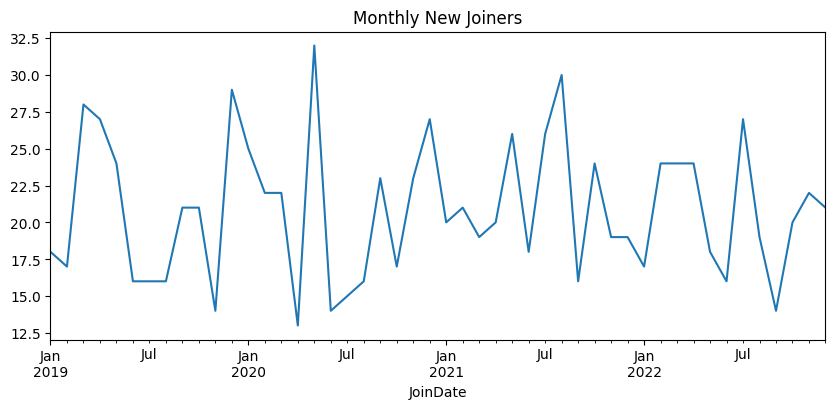

In [20]:
# Monthly new joiners
employee_data['JoinDate'] = pd.to_datetime(employee_data['JoinDate'])
monthly_joins = employee_data.set_index('JoinDate').resample('M')['EmployeeID'].count()
monthly_joins.plot(title='Monthly New Joiners', figsize=(10,4));

## Exercice: Sales Data Analysis

You are provided with a dataset `sales_data.csv` containing retail transactions with the following columns:

- `OrderID`: Order identifier  
- `CustomerID`: Unique customer identifier  
- `Product`: Product name  
- `Category`: Product category  
- `Quantity`: Number of units sold  
- `Price`: Unit price  
- `OrderDate`: Date of the order  
- `Country`: Customer's country  

### Tasks:

1. **Basic Exploration**:
   - Display the first 5 rows.
   - Count missing values in each column.
   - Print summary statistics for `Quantity` and `Price`.

2. **Data Cleaning**:
   - Remove rows where `Quantity` or `Price` is less than or equal to 0.
   - Convert `OrderDate` to datetime format.

3. **Feature Engineering**:
   - Create a new column `TotalAmount` = `Quantity` × `Price`.
   - Extract the `Month` and `DayOfWeek` from `OrderDate`.

4. **Analysis**:
   - What is the total revenue per `Country`? (Sort descending)
   - What are the top 5 best-selling products by `Quantity`?
   - How many unique customers are there in each `Country`?

5. **Time Series Aggregation**:
   - Plot total daily revenue (`OrderDate` vs. `TotalAmount`) using a line plot.
   - Compute the monthly average quantity sold per category.

> 💡 Use `.groupby()`, `.agg()`, `.pivot_table()`, and visualization functions where appropriate.

In [21]:
# Charger les données de ventes
df = pd.read_csv('sales_data.csv')

# Affiche les 5 premières lignes
df.head()

# Compte les valeurs manquantes
df.isnull().sum()

# Statistiques pour Quantity et Price
df[['Quantity', 'Price']].describe()


,Quantity,Price
count,500.000000,500.00000
mean,4.896000,507.91238
std,2.567171,287.00474
min,1.000000,8.20000
25%,3.000000,257.79500
50%,5.000000,517.38500
75%,7.000000,760.82250
max,9.000000,998.36000


In [16]:
# Supprime les lignes avec quantité ou prix <= 0
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Convertit OrderDate en datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


In [22]:
# Crée TotalAmount
df['TotalAmount'] = df['Quantity'] * df['Price']

# Extrait le mois et le jour de la semaine
df['Month'] = df['OrderDate'].dt.month
df['DayOfWeek'] = df['OrderDate'].dt.dayofweek


AttributeError: Can only use .dt accessor with datetimelike values

In [18]:
# Total par pays
df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

# Top 5 produits les plus vendus
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

# Nombre de clients uniques par pays
df.groupby('Country')['CustomerID'].nunique()


Country
France      97
Germany     95
Spain       99
UK          89
USA        104
Name: CustomerID, dtype: int64

<Axes: title={'center': 'Monthly Avg Quantity per Category'}, xlabel='OrderDate'>

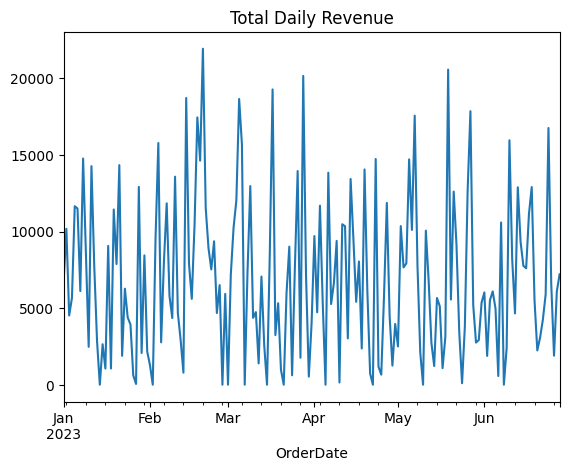

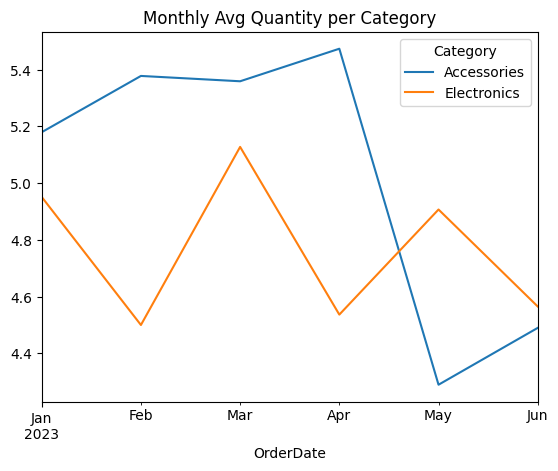

In [24]:
# Courbe des revenus journaliers
df = df.copy()
df['OrderDate'] = pd.to_datetime(df['OrderDate'])  # Assure que c'est bien datetime
df.set_index('OrderDate')['TotalAmount'].resample('D').sum().plot(title="Total Daily Revenue")

# Quantité moyenne mensuelle par catégorie
df.groupby(['Category', df['OrderDate'].dt.to_period('M')])['Quantity'].mean().unstack(0).plot(title="Monthly Avg Quantity per Category")
